In [2]:
from numpy import arange
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show, savefig
from sklearn.linear_model import LinearRegression
from dslabs_functions import plot_line_chart, HEIGHT,ts_aggregation_by, series_train_test_split, plot_forecasting_eval, plot_forecasting_series

/home/dorian/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
file_tag = "forecast_covid"
filename = "datasets/forecast_covid_single.csv"
index = "date"
target = "deaths"
data: DataFrame = read_csv(
    filename,
    index_col=index,
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]

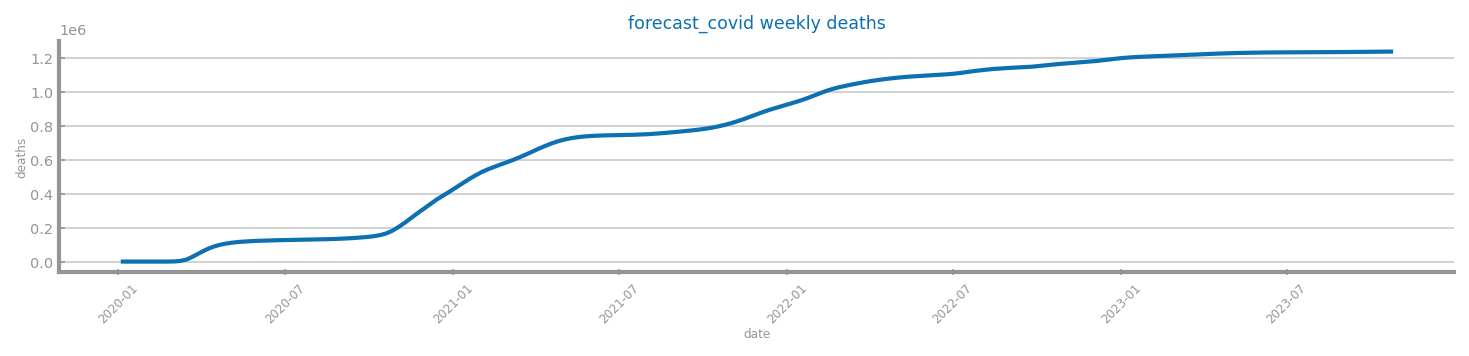

In [4]:
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} weekly {target}",
)

#dont uncomment this, its just an example of the savefig, since the teacher doesn't save the pics this time
#savefig(f"images/forecast/{file_tag}_data_transformation_aggregation_<whatever-you-doing-in-this-step>", bbox_inches="tight")
show()

# Aggregation

In [5]:
ss_agg_w: DataFrame = ts_aggregation_by(data, gran_level="W", agg_func="sum")
ss_agg_m: DataFrame = ts_aggregation_by(data, gran_level="M", agg_func="sum")
ss_agg_q: DataFrame = ts_aggregation_by(data, gran_level="Q", agg_func="sum")
datas = [ss_agg_w,ss_agg_m,ss_agg_q]
names = ["week","month","quarter"]

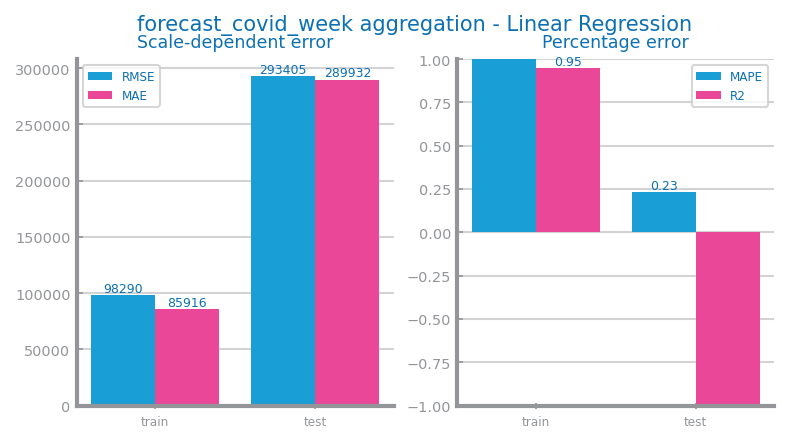

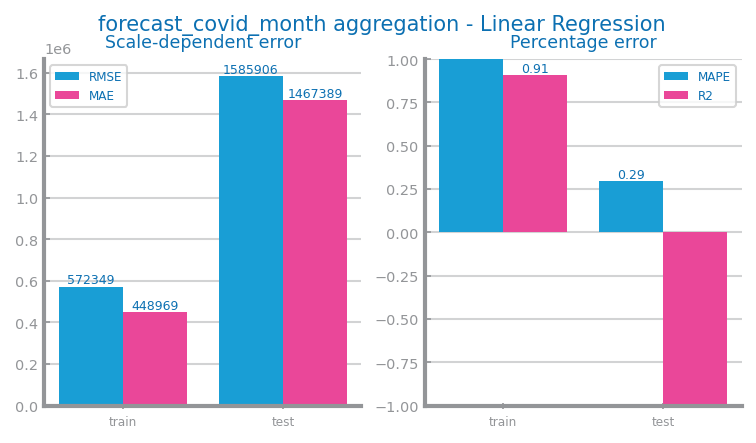

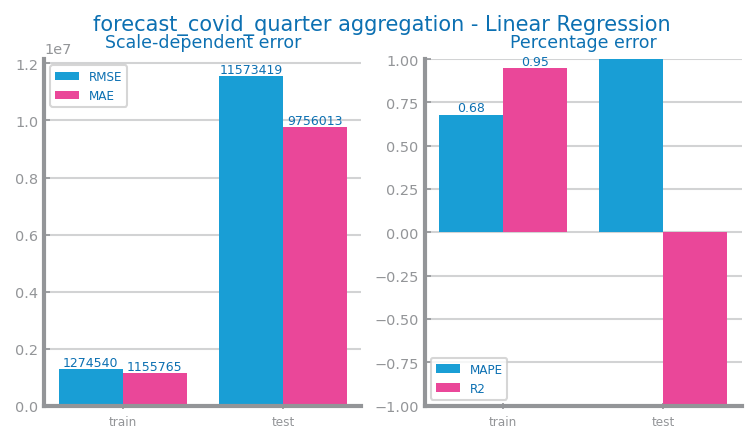

In [6]:
for dataframe, name in zip(datas, names):
    train, test = series_train_test_split(dataframe, trn_pct=0.90)

    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)

    plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag}_{name} aggregation - Linear Regression")
    savefig(f"images/forecast/{file_tag}_{name}_data_transformation_aggregation_linear_regression_eval.png")

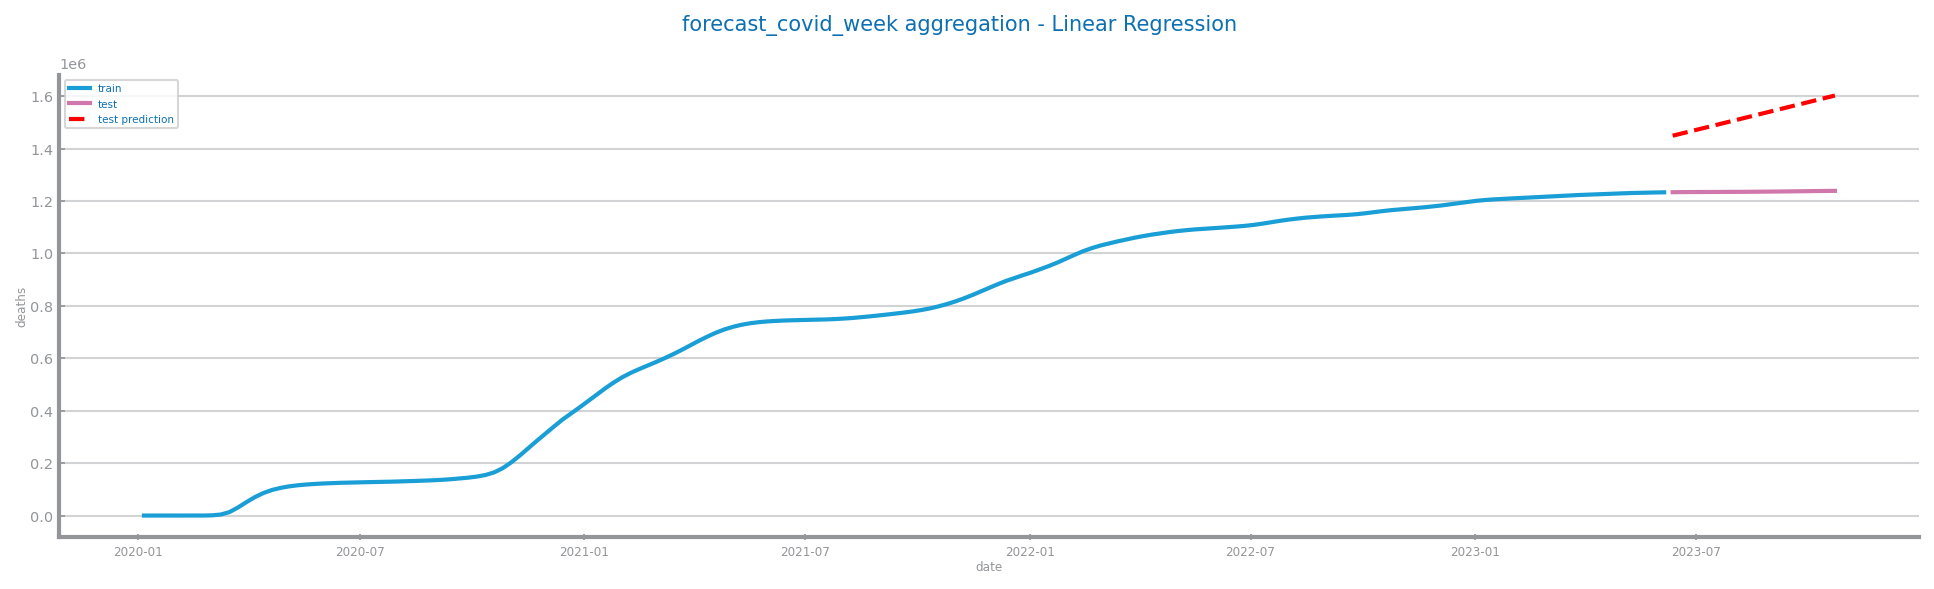

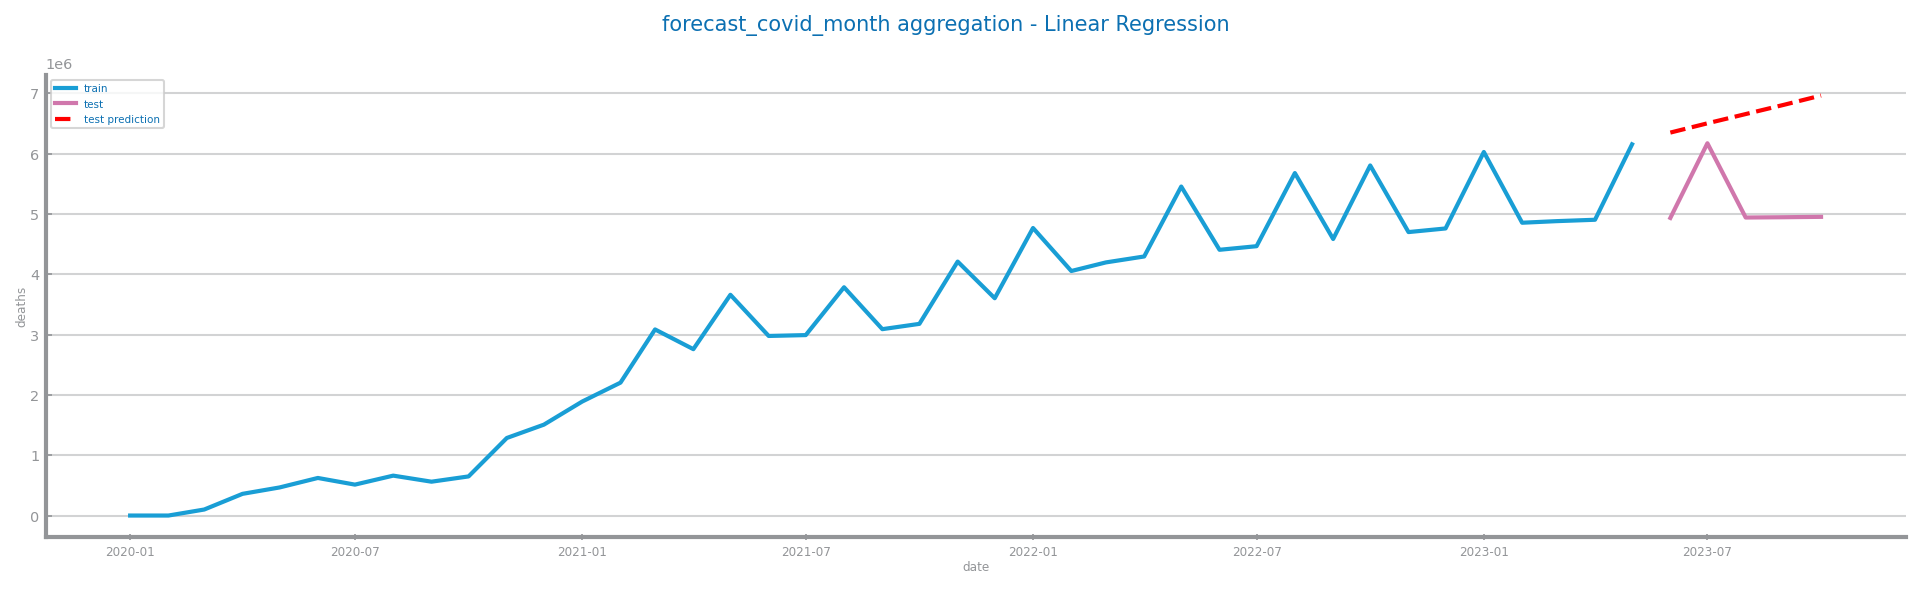

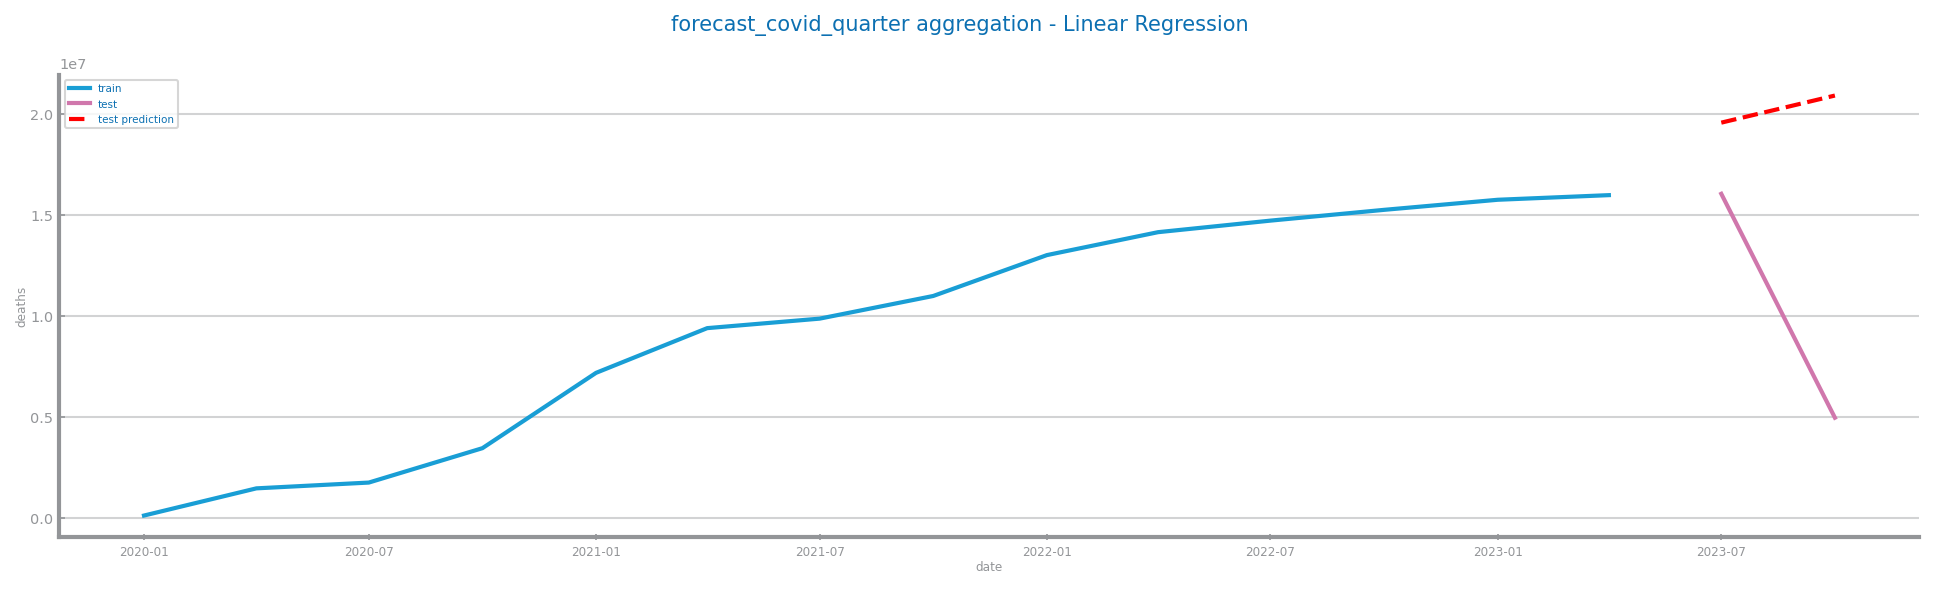

In [7]:
for dataframe, name in zip(datas, names):
    train, test = series_train_test_split(dataframe, trn_pct=0.90)

    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(dataframe)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)
    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag}_{name} aggregation - Linear Regression",
        xlabel=series.index.name,
        ylabel=target,
    )
    savefig(f"images/forecast/{file_tag}_{name}_data_transformation_aggregation_linear_regression_forecast.png")

## Selecting Best

In [ ]:
data = best_aggregation

# Smoothing

In [ ]:
train, test = series_train_test_split(data, trn_pct=0.90)

trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(data)).reshape(-1, 1)
tstY = test.to_numpy()

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} aggregation - Linear Regression")
savefig(f"images/{file_tag}_data_transformation_aggregation_linear_regression_eval.png")

In [ ]:
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} aggregation - Linear Regression",
    xlabel=series.index.name,
    ylabel=target,
)
savefig(f"images/{file_tag}_data_transformation_aggregation_linear_regression_forecast.png")

## Selecting best

# Differentiation

In [ ]:
train, test = series_train_test_split(data, trn_pct=0.90)

trnX = arange(len(train)).reshape(-1, 1)
trnY = train.to_numpy()
tstX = arange(len(train), len(data)).reshape(-1, 1)
tstY = test.to_numpy()

model = LinearRegression()
model.fit(trnX, trnY)

prd_trn: Series = Series(model.predict(trnX), index=train.index)
prd_tst: Series = Series(model.predict(tstX), index=test.index)

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} aggregation - Linear Regression")
savefig(f"images/{file_tag}_data_transformation_aggregation_linear_regression_eval.png")

In [ ]:
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} aggregation - Linear Regression",
    xlabel=series.index.name,
    ylabel=target,
)
savefig(f"images/{file_tag}_data_transformation_aggregation_linear_regression_forecast.png")